<a href="https://colab.research.google.com/github/HEMASAGAR07/CODSOFT/blob/main/Credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd

train_data = '/content/fraudTrain.csv'
test_data = '/content/fraudTest.csv'

train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)

In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310253 entries, 0 to 310252
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             310253 non-null  int64  
 1   trans_date_trans_time  310253 non-null  object 
 2   cc_num                 310252 non-null  float64
 3   merchant               310252 non-null  object 
 4   category               310252 non-null  object 
 5   amt                    310252 non-null  float64
 6   first                  310252 non-null  object 
 7   last                   310252 non-null  object 
 8   gender                 310252 non-null  object 
 9   street                 310252 non-null  object 
 10  city                   310252 non-null  object 
 11  state                  310252 non-null  object 
 12  zip                    310252 non-null  float64
 13  lat                    310252 non-null  float64
 14  long                   310252 non-nu

In [55]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,306371.000000,3.063700e+05,306370.000000,306370.000000,306370.000000,306370.000000,3.063700e+05,3.063700e+05,306370.000000,306370.000000,306370.000000
mean,153185.000000,4.161862e+17,70.796042,48754.918403,38.533603,-90.205575,8.961547e+04,1.332281e+09,38.533256,-90.205739,0.007439
std,88441.833998,1.307263e+18,155.791044,26911.215911,5.078393,13.770789,3.036532e+05,3.660278e+06,5.113046,13.782841,0.085927
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,76592.500000,1.800365e+14,9.650000,26041.000000,34.620500,-96.798000,7.430000e+02,1.329257e+09,34.729151,-96.876063,0.000000
50%,153185.000000,3.519607e+15,47.620000,48154.000000,39.354300,-87.458100,2.456000e+03,1.332517e+09,39.355727,-87.411705,0.000000
75%,229777.500000,4.642255e+15,83.390000,72011.000000,41.894800,-80.128400,2.047800e+04,1.335443e+09,41.955067,-80.202284,0.000000
max,306370.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.338219e+09,67.510267,-66.956540,1.000000


In [56]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [57]:
print(train_df['is_fraud'].value_counts())

0.0    304091
1.0      2279
Name: is_fraud, dtype: int64


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

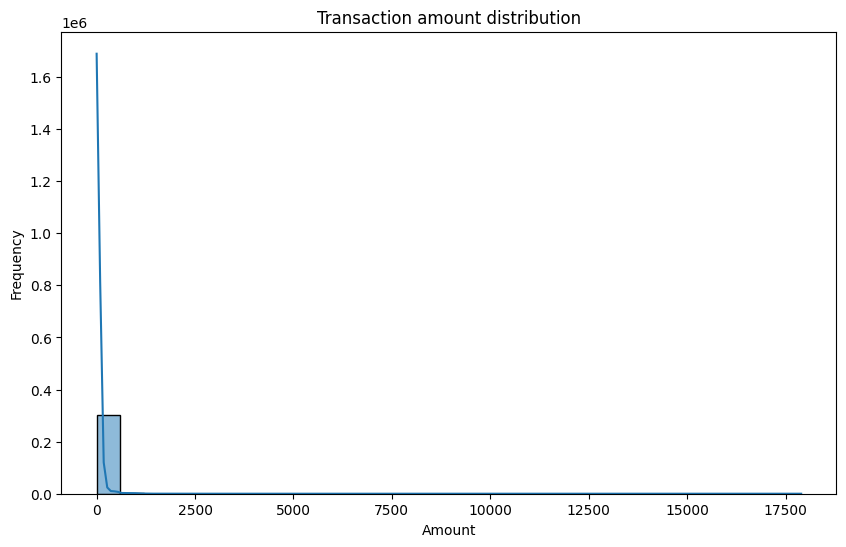

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['amt'], bins=30, kde=True)
plt.title('Transaction amount distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

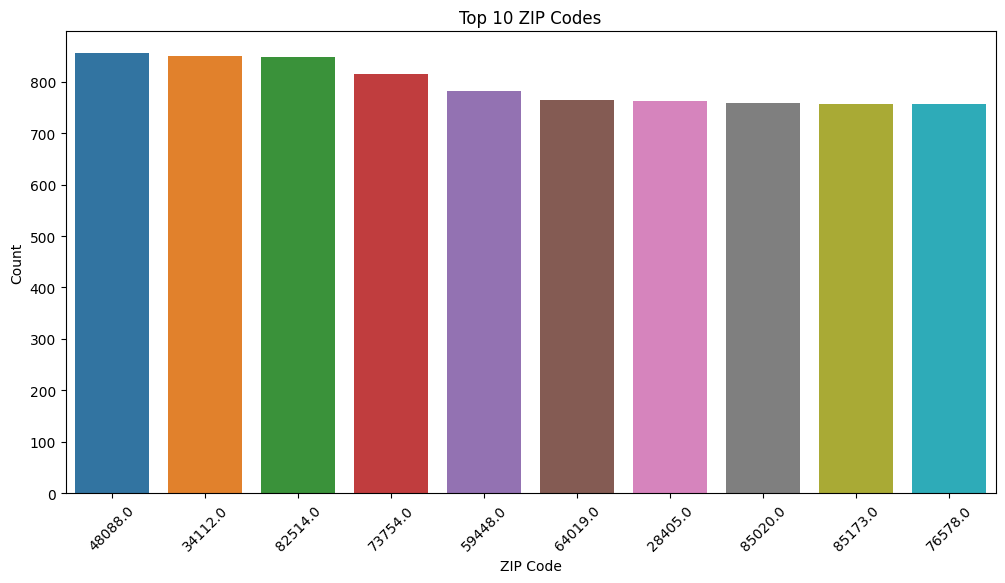

In [60]:
zip_codes = train_df['zip'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='zip', data=train_df[train_df['zip'].isin(zip_codes)], order=zip_codes)
plt.title('Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

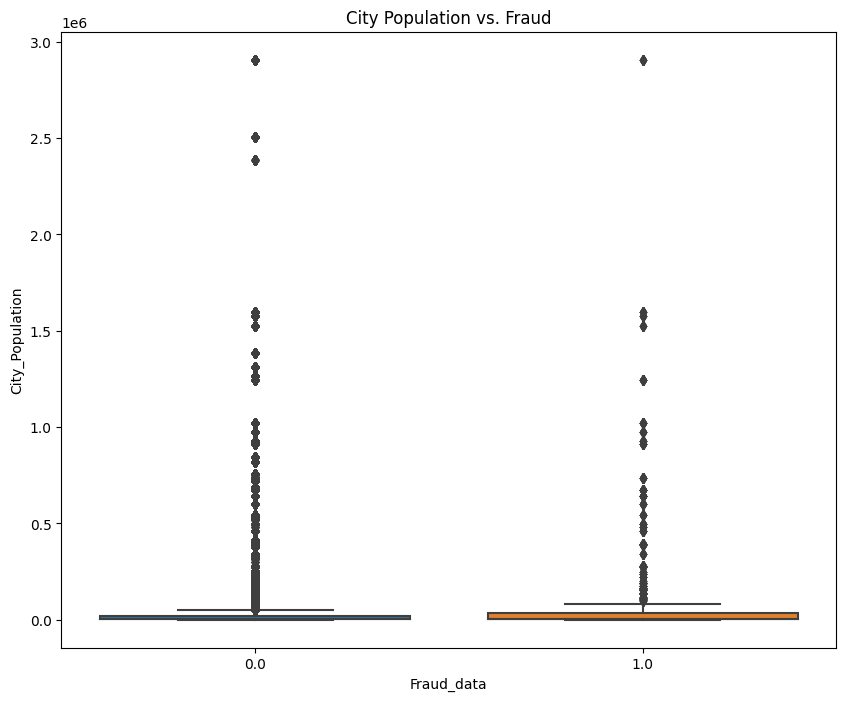

In [74]:
# Box plot of 'city_pop' with 'is_fraud' as hue
plt.figure(figsize=(10, 8))
sns.boxplot(x='is_fraud', y='city_pop', data=train_df)
plt.title('City Population vs. Fraud')
plt.xlabel('Fraud_data')
plt.ylabel('City_Population')
plt.show()

<ipython-input-62-9c1822a0d4c5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


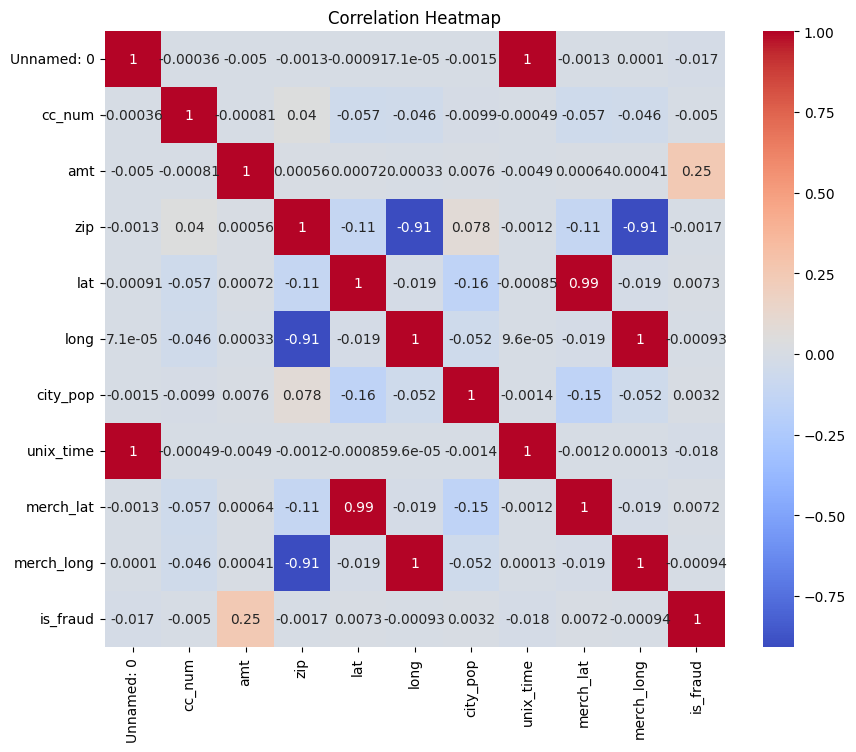

In [62]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [63]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

In [64]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train_df[features]
y = train_df['is_fraud']

In [65]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Build and train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Evaluate the model
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60832
         1.0       0.83      0.55      0.66       443

    accuracy                           1.00     61275
   macro avg       0.91      0.77      0.83     61275
weighted avg       1.00      1.00      1.00     61275



In [68]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [69]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [70]:
# Evaluate the model
from sklearn.metrics import classification_report
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     60832
         1.0       0.83      0.55      0.66       443

    accuracy                           1.00     61275
   macro avg       0.91      0.77      0.83     61275
weighted avg       1.00      1.00      1.00     61275



In [71]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
